# Fake News Prediction

In [1]:
!pip install pyspellchecker

In [2]:
#Library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string
import re

from collections import defaultdict
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, log_loss,confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from spellchecker import SpellChecker

In [3]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [4]:
fake["type"] = 1
true["type"] = 0

In [5]:

lst = []
for text in true["text"]:
  temp = re.sub(r"^.*Reuters+\W+[-]+\W", r"", text)
  lst.append(temp)
     

In [6]:

true["text"] = lst

In [7]:
df = pd.concat([fake,true], axis = 0).reset_index(drop = True)

In [8]:
df.head()

,title,text,subject,date,type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


## Exploratory Data Analysis
### Visualization of Target Label (Type)

Text(0.5, 1.0, 'Bar Chart of Type')

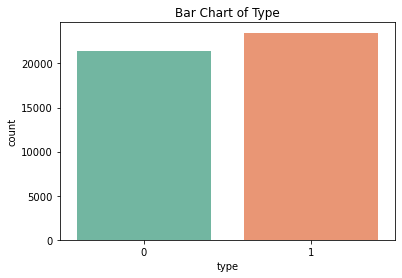

In [9]:
ax = sns.countplot(x = "type", data = df, palette = "Set2")
ax.set_title("Bar Chart of Type")

### Pie chart of Target

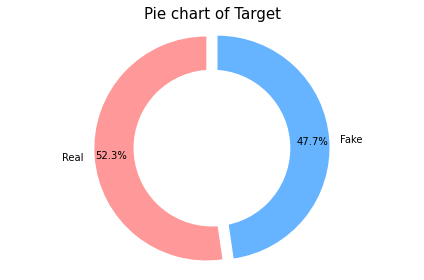

In [10]:
labels = ['Real', 'Fake']
values = df['type'].value_counts()
colors = ['#ff9999','#66b3ff']
explode = (0.05,0.05)

fig1, ax1 = plt.subplots()

plt.pie(values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
ax1.set_title("Pie chart of Target", 
              fontdict = {'fontsize' : 15,
                          'fontweight' : 10},
              loc = 'center')
plt.tight_layout()
plt.show()

In [14]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Word Cloud Text

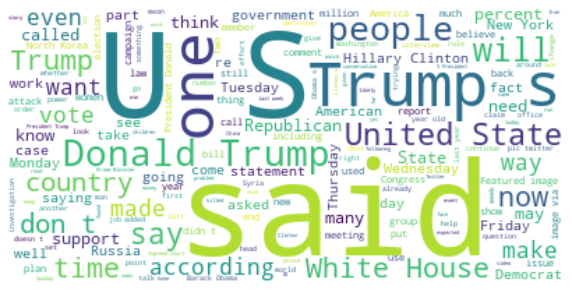

In [15]:
#Join question into one text
text = " ".join(text for text in df['text'])

#Create Stopword List
stopwords = set(STOPWORDS)

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

#Display the generated image
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word Cloud Fake

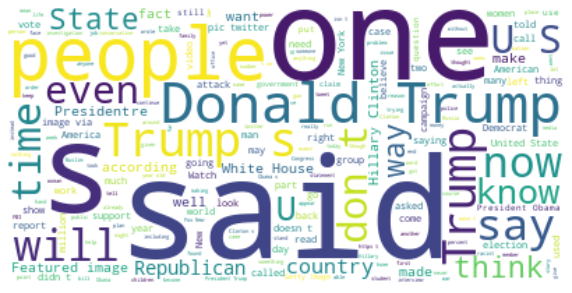

In [16]:
#Join question into one text
text_fake = df.loc[df["type"] == 1, "text"]
text = " ".join(text for text in text_fake)

#Create Stopword List
stopwords = set(STOPWORDS)

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

#Display the generated image
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word Cloud Real

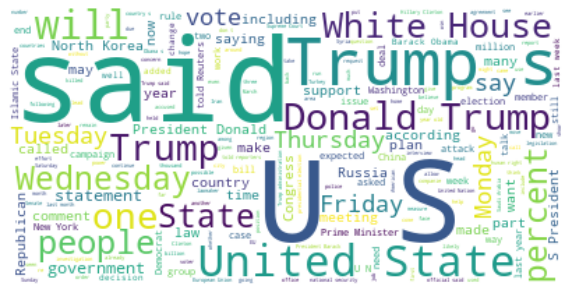

In [17]:
#Join question into one text
text_real = df.loc[df["type"] == 0, "text"]
text = " ".join(text for text in text_real)

#Create Stopword List
stopwords = set(STOPWORDS)

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

#Display the generated image
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Number of Character

C:\Users\DHRUPAD CHAKRABORTY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHRUPAD CHAKRABORTY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


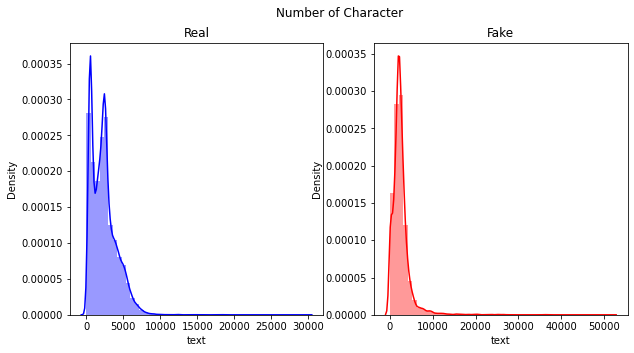

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

num_char1 = df.loc[df['type'] == 0, "text"].str.len()
sns.distplot(num_char1, ax = ax1, color = "blue")
ax1.set_title("Real")

num_char2 = df.loc[df['type'] == 1, "text"].str.len()
sns.distplot(num_char2, ax = ax2, color = "red")
ax2.set_title("Fake")

fig.suptitle("Number of Character")
plt.show()

### Number of word

C:\Users\DHRUPAD CHAKRABORTY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHRUPAD CHAKRABORTY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


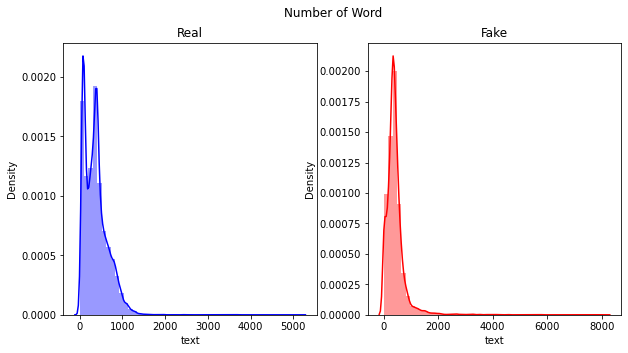

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

num_word1 = df.loc[df['type'] == 0, "text"].str.split().map(lambda x : len(x))
sns.distplot(num_word1, ax = ax1, color = "blue")
ax1.set_title("Real")

num_word2 = df.loc[df['type'] == 1, "text"].str.split().map(lambda x : len(x))
sns.distplot(num_word2, ax = ax2, color = "red")
ax2.set_title("Fake")

fig.suptitle("Number of Word")

plt.show()

### Mean of character in word

C:\Users\DHRUPAD CHAKRABORTY\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\DHRUPAD CHAKRABORTY\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\DHRUPAD CHAKRABORTY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHRUPAD CHAKRABORTY\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\DHRUPAD CHAKRABORTY\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWar

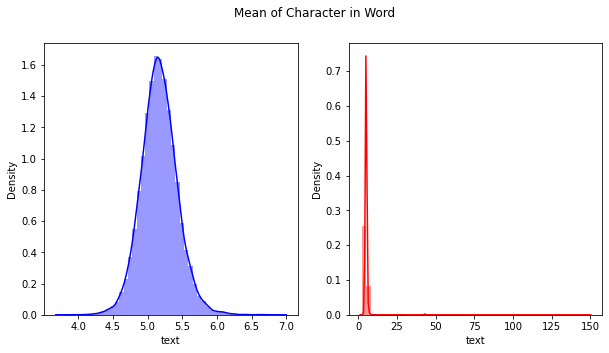

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

mean_char1 = df.loc[df["type"] == 0, "text"].str.split().map(lambda x : [len(i) for i in x])
sns.distplot(mean_char1.map(lambda x : np.mean(x)), ax = ax1, color = "blue")

mean_char2 = df.loc[df["type"] == 1, "text"].str.split().map(lambda x : [len(i) for i in x])
sns.distplot(mean_char2.map(lambda x : np.mean(x)), ax = ax2, color = "red")

fig.suptitle("Mean of Character in Word")
plt.show()

### Stopwords Analysis

In [22]:
# Make Corpus

def make_corpus(type):
  corpus = []

  for text in df.loc[df["type"] == type, "text"].str.split():
    for word in text:
      corpus.append(word.lower())
  
  return(corpus)

### Punctuation Analysis

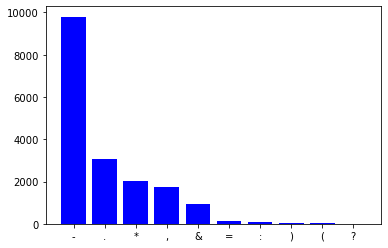

In [25]:
# Corpus Real

dic_real = defaultdict(int)
punct = string.punctuation

for word in corpus_real:
  if word in punct:
    dic_real[word] = dic_real[word] + 1

top = sorted(dic_real.items(), key = lambda x : x[1], reverse = True)[:10]

x,y = zip(*top)
plt.bar(x,y, color = "blue");

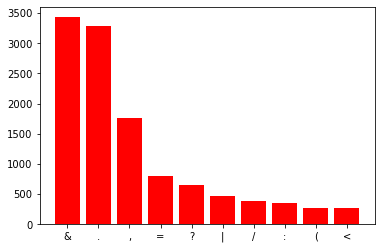

In [27]:
# Corpus Fake

dic_fake = defaultdict(int)
punct = string.punctuation

corpus_fake = make_corpus(1)

for word in corpus_fake:
  if word in punct:
    dic_fake[word] = dic_fake[word] + 1

top = sorted(dic_fake.items(), key = lambda x : x[1], reverse = True)[:10]

x,y = zip(*top)
plt.bar(x,y, color = "red");

### Bi-gram Analysis

In [28]:
corpus = corpus_fake + corpus_real

def get_top_bigram(corpus, n=None):

  vec = CountVectorizer(ngram_range = (2,2)).fit(corpus)
  bow = vec.transform(corpus)
  sum_word = bow.sum(axis = 0)
  word_freq = [(word, sum_word[0,idx]) for word, idx in vec.vocabulary_.items()]
  word_freq = sorted(word_freq, key = lambda x : x[1], reverse= True)

  return word_freq[:n]
     

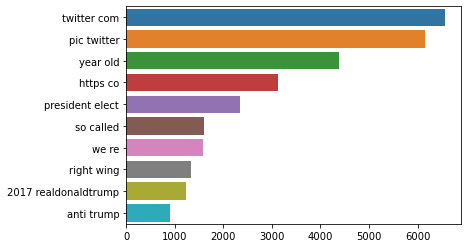

In [29]:
top_bigram = get_top_bigram(corpus, 10)

x,y = map(list, zip(*top_bigram))
sns.barplot(x = y, y = x);

### Preprocessing
## Cleaning

In [30]:
def remove_url(text):
  url = re.compile(r"https?://\S+|www\.\S+")
  return url.sub(r"", text)

In [31]:
def remove_html(text):
  html = re.compile(r"<.*?>")
  return html.sub(r"", text)

In [32]:
def remove_emoji(text):
    emoji = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji.sub(r'', text)
     

In [35]:
def spell_checking(text):

  spell = SpellChecker()
  correct = []

  miss_spell = spell.unknown(text.split())

  for word in text.split():
    if word in miss_spell:
      correct.append(spell.correction(word))
    else:
      correct.append(word)
  
  return " ".join(correct)

In [36]:
def remove_stopword(text):
  temp = [word for word in text if word not in stop]
  return temp

In [37]:
def remove_single_alphabet(text):
  temp = [word for word in text if word not in string.ascii_lowercase]
  return temp

In [38]:
def cleaning_text(text):
  text = text.apply(lambda x : remove_url(x))
  text = text.apply(lambda x : remove_html(x))
  text = text.apply(lambda x : remove_emoji(x))
  text = text.apply(lambda x : x.lower())
  text = text.apply(lambda x : remove_punct(x))
  # text = text.apply(lambda x : spell_checking(x))
  return text 

In [39]:
def list_to_string(text):
  return " ".join(text)

In [41]:
df["text"]

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
44893    NATO allies on Tuesday welcomed President Dona...
44894    LexisNexis, a provider of legal, regulatory an...
44895    In the shadow of disused Soviet-era factories ...
44896    Vatican Secretary of State Cardinal Pietro Par...
44897    Indonesia will buy 11 Sukhoi fighter jets wort...
Name: text, Length: 44898, dtype: object

## Splitting Train & Test

In [42]:
# Splitting
from sklearn.model_selection import train_test_split

X = df["text"]
y = df["type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18)

## Feature Extraction
### Bag Of Word

In [43]:
# Bag of Word

vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000)

train_features = vectorizer.fit_transform(X_train)
train_features = train_features.toarray()

test_features = vectorizer.transform(X_test)
test_features = test_features.toarray()

## Modelling
### Random Forest

In [44]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)
rf = rf.fit(train_features, y_train)
rf_pred = rf.predict(test_features)

In [46]:
accuracy = accuracy_score(y_test, rf_pred)
presisi = precision_score(y_test, rf_pred)
recall = recall_score(y_test,rf_pred)

print("Accuracy : {}".format(accuracy))
print("Precision : {}".format(presisi))
print("Recall : {}".format(recall))

Accuracy : 0.9885300668151448
Precision : 0.9907427341227126
Recall : 0.9871299871299871


## Naive Bayes

In [47]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb = nb.fit(train_features, y_train)
nb_pred = nb.predict(test_features)


In [48]:
accuracy = accuracy_score(y_test, nb_pred)
presisi = precision_score(y_test, nb_pred)
recall = recall_score(y_test,nb_pred)

print("Accuracy : {}".format(accuracy))
print("Precision : {}".format(presisi))
print("Recall : {}".format(recall))

Accuracy : 0.9454342984409799
Precision : 0.9476394849785408
Recall : 0.9472329472329473


## Logistic Regression

In [50]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

reglog = LogisticRegression()
reglog = reglog.fit(train_features, y_train)
reglog_pred = reglog.predict(test_features)

C:\Users\DHRUPAD CHAKRABORTY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
accuracy = accuracy_score(y_test, reglog_pred)
presisi = precision_score(y_test, reglog_pred)
recall = recall_score(y_test,reglog_pred)

print("Accuracy : {}".format(accuracy))
print("Precision : {}".format(presisi))
print("Recall : {}".format(recall))

Accuracy : 0.988641425389755
Precision : 0.9851063829787234
Recall : 0.9931359931359931


## Light GBM

In [56]:
!pip install lightgbm

In [57]:
#LigthGBM

import lightgbm as lgb

lgbm = lgb.LGBMClassifier()
lgbm = lgbm.fit(train_features, y_train)
lgbm_pred = lgbm.predict(test_features)

In [58]:
accuracy = accuracy_score(y_test, lgbm_pred)
presisi = precision_score(y_test, lgbm_pred)
recall = recall_score(y_test,lgbm_pred)

print("Accuracy : {}".format(accuracy))
print("Precision : {}".format(presisi))
print("Recall : {}".format(recall))

Accuracy : 0.9891982182628062
Precision : 0.98949174351276
Recall : 0.9897039897039897
